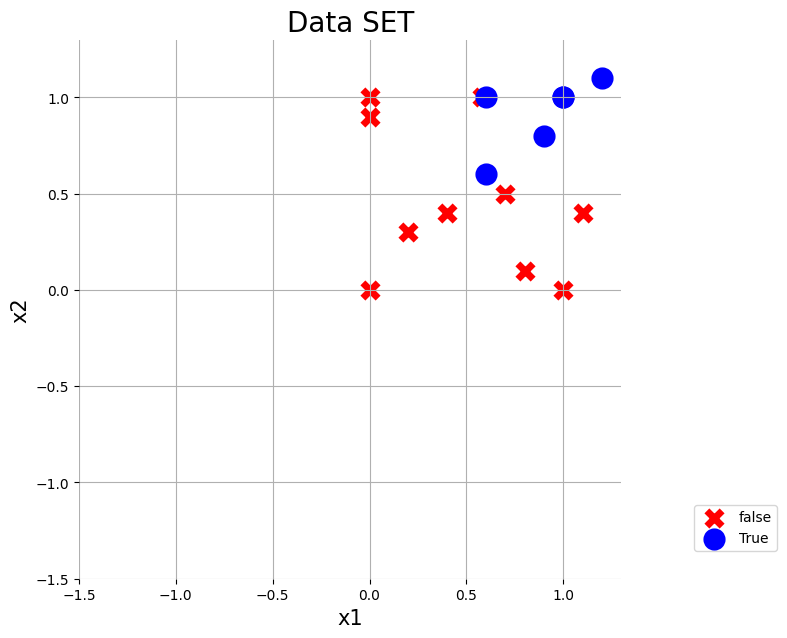

In [1]:
# Este codigo solo muestra los puntos clasifiacados segun su clase
import numpy as np
import matplotlib.pyplot as plt

# atributos     ->   [x1, x2]
individuo = np.array([[1, 0],       # Clase -1 (False)
                      [0, 1],       # Clase -1 (False)
                      [0, 0],       # Clase -1 (False)
                      [1, 1],       # Clase 1 (True)
                      [0.2, 0.3],   # Clase -1 (False)
                      [0.8, 0.1],   # Clase -1 (False)
                      [0.0, 0.9],   # Clase -1 (False)
                      [1.1, 0.4],   # Clase -1 (False)
                      [0.6, 0.6],   # Traslape: Clase 1 (True) pero cerca del límite
                      [1.0, 1.0],   # Clase 1 (True)
                      [0.9, 0.8],   # Clase 1 (True)
                      [0.4, 0.4],   # Clase -1 (False)
                      [1.2, 1.1],   # Clase 1 (True)
                      [0.7, 0.5],    # Traslape: Clase -1 (False) pero cerca del límite
                      [0.6, 1],    # Traslape: Clase -1 (False) pero cerca del límite
                      [0.58, 1],    # Traslape: Clase -1 (False) pero cerca del límite
                     ])
# 1 : true    -1 : false
clases = np.array([-1, -1, -1, 1,-1, -1, -1, -1, 1, 1, 1, -1, 1, -1,1,-1])

# Gráfica de dispersión (x1, x2)
plt.figure(figsize=(7, 7))
plt.title("Data SET", fontsize=20)
plt.scatter(individuo [clases == -1].T[0], 
            individuo [clases == -1].T[1], 
            marker="x", s=120, color="red",
            linewidths=5, label="false")
plt.scatter(individuo [clases == 1].T[0],
            individuo [clases == 1].T[1], 
            marker="o", s=120, color="blue",
            linewidths=5, label="True")
plt.xlabel("x1", fontsize=15)
plt.ylabel("x2", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((-1.5, 1.3))
plt.ylim((-1.5, 1.3))
plt.grid()
plt.show()

In [10]:
# Este codigo ejecuta las epocas definidas en el while.

# pesos    se pueden cambiar
w1 = 0.5
w2 = -0.5
# bias   se puede cambiar
b = -1
# α parámetro de aprendizaje  se puede cambiar
pa = 0.2
numEpocas=7 # **aqui se cambia el numero de epocas**
# épocas 
epocas = 0
# guarda la suma de los errores por iteracion y vuelve a 0 al incio de cada epoca
sumaErrores=0
# se guarda el error por epoca
error= []
# contaSinError = 0
longitud = len(clases)
# guarda los aciertos de cada epoca
# aciertos = []
while epocas != numEpocas:   
    print("\n--- Epoca:", epocas+1, "---")
    for i in range(individuo.shape[0]):
        print("Iteracion:", i + 1)  # Imprimir el índice de la fila
        print("num1:", individuo[i, 0], "num2:", individuo[i, 1])
        y = (w1 * individuo[i, 0]) + (w2 * individuo[i, 1]) + b
        print("Y:", y)

        # Verificar si la predicción es correcta
        if y == clases[i]:
            print("No actualizo pesos, ni bias")
            #contaSinError += 1
        else:
            print("Actualizo pesos y bias")
            w1 = w1 + pa * (clases[i]-y) * individuo[i, 0]
            w2 = w2 + pa * (clases[i]-y) * individuo[i, 1]
            b = b + pa * (clases[i]-y)
            print("w1_new:", w1, "w2_new::", w2, "b_new:", b)
            # calculo el error en la iteracion correpondiente
            sumaErrores=(((clases[i]-y) ** 2) /2)+sumaErrores
    # Incrementar épocas después de recorrer todos los individuos
    epocas += 1
    print("Epocas:", epocas, "SumaErrores:", sumaErrores)
    error.append(sumaErrores)
    sumaErrores = 0
     
            


--- Epoca: 1 ---
Iteracion: 1
num1: 1.0 num2: 0.0
Y: -0.5
Actualizo pesos y bias
w1_new: 0.4 w2_new:: -0.5 b_new: -1.1
Iteracion: 2
num1: 0.0 num2: 1.0
Y: -1.6
Actualizo pesos y bias
w1_new: 0.4 w2_new:: -0.38 b_new: -0.9800000000000001
Iteracion: 3
num1: 0.0 num2: 0.0
Y: -0.9800000000000001
Actualizo pesos y bias
w1_new: 0.4 w2_new:: -0.38 b_new: -0.9840000000000001
Iteracion: 4
num1: 1.0 num2: 1.0
Y: -0.9640000000000001
Actualizo pesos y bias
w1_new: 0.7928000000000001 w2_new:: 0.012800000000000034 b_new: -0.5912000000000001
Iteracion: 5
num1: 0.2 num2: 0.3
Y: -0.4288
Actualizo pesos y bias
w1_new: 0.7699520000000001 w2_new:: -0.021471999999999963 b_new: -0.7054400000000001
Iteracion: 6
num1: 0.8 num2: 0.1
Y: -0.09162559999999997
Actualizo pesos y bias
w1_new: 0.6246120960000001 w2_new:: -0.039639487999999966 b_new: -0.88711488
Iteracion: 7
num1: 0.0 num2: 0.9
Y: -0.9227904192
Actualizo pesos y bias
w1_new: 0.6246120960000001 w2_new:: -0.05353721254399996 b_new: -0.9025567961600001


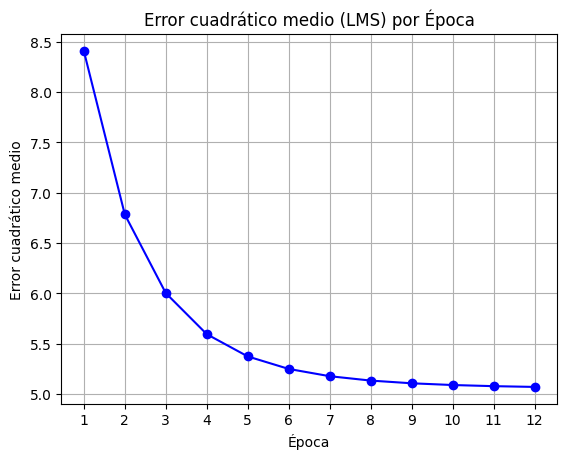

In [8]:
# Crear la gráfica de el error cuadrático medio por epoca
epocas = range(1, len(error) + 1)
plt.plot(epocas, error, marker='o', linestyle='-', color='b')  # Línea con puntos marcados
plt.title('Error cuadrático medio (LMS) por Época')  # Título de la gráfica
plt.xlabel('Época')  # Etiqueta del eje X
plt.ylabel('Error cuadrático medio')  # Etiqueta del eje Y
plt.grid(True)  # Agregar una cuadrícula para mejor visualización
plt.xticks(epocas)  # Asegurar que las épocas se muestren correctamente en el eje X
plt.show()  # Mostrar la gráfica          

Ingrese x1 con un valor entre -1 y 1:  1
Ingrese x2 con un valor entre -1 y 1:  0.7


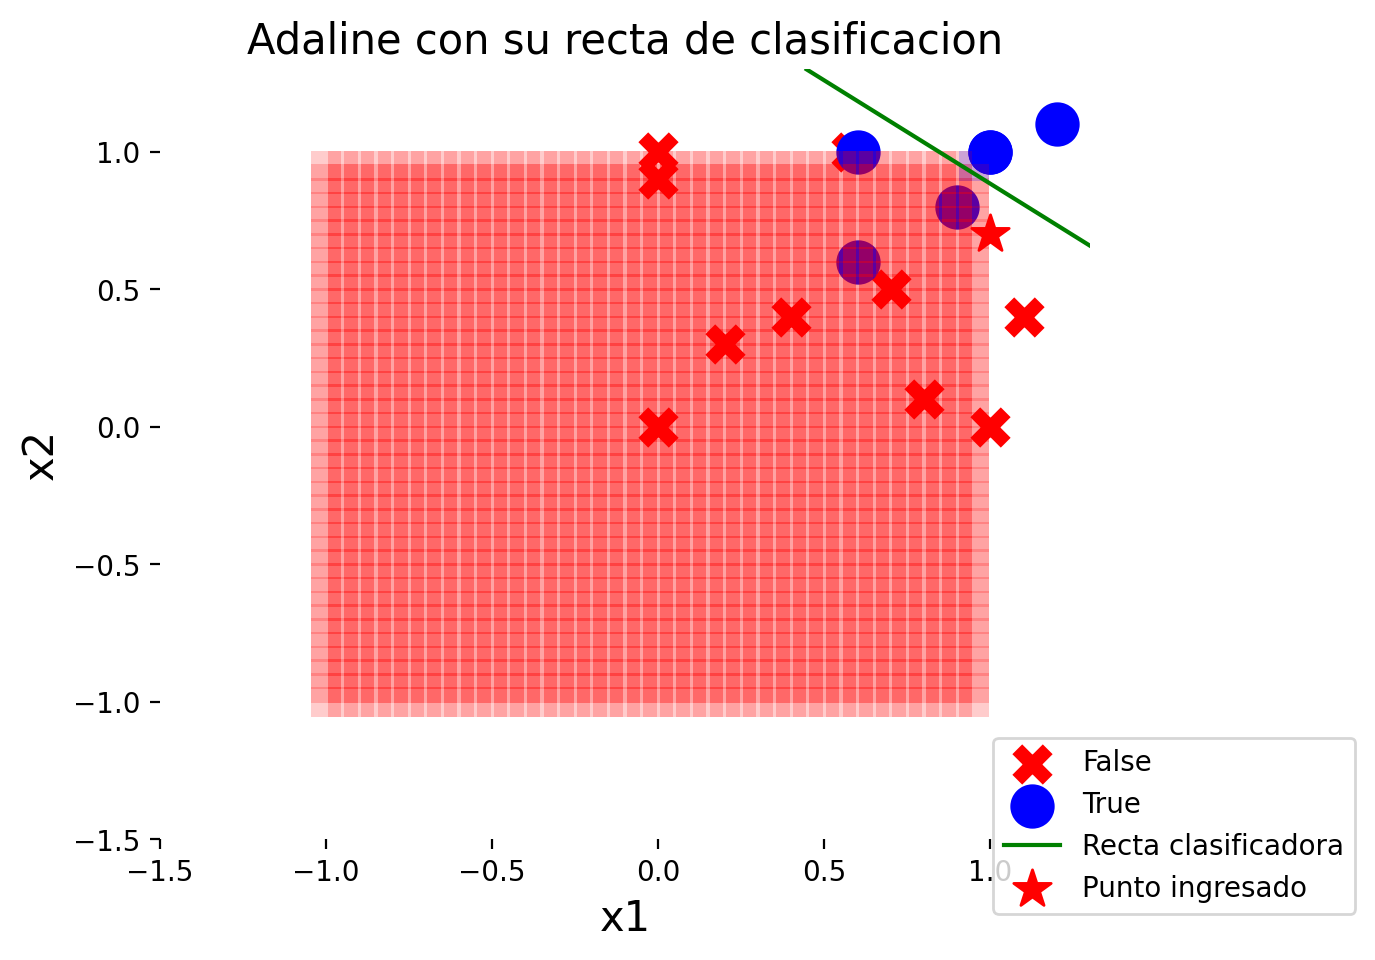

In [9]:
def validar_entrada(mensaje):
    while True:
        try:
            valor = float(input(mensaje))
            if -1 <= valor <= 1:
                return valor
            else:
                print("Error: El valor debe estar entre -1 y 1. Intente nuevamente.")
        except ValueError:
            print("Error: Ingrese un número válido.")

# Datos de ejemplo (simulando tus datos)
# atributos     ->   [x1, x2]
individuo = np.array([[1, 0],       # Clase -1 (False)
                      [0, 1],       # Clase -1 (False)
                      [0, 0],       # Clase -1 (False)
                      [1, 1],       # Clase 1 (True)
                      [0.2, 0.3],   # Clase -1 (False)
                      [0.8, 0.1],   # Clase -1 (False)
                      [0.0, 0.9],   # Clase -1 (False)
                      [1.1, 0.4],   # Clase -1 (False)
                      [0.6, 0.6],   # Traslape: Clase 1 (True) pero cerca del límite
                      [1.0, 1.0],   # Clase 1 (True)
                      [0.9, 0.8],   # Clase 1 (True)
                      [0.4, 0.4],   # Clase -1 (False)
                      [1.2, 1.1],   # Clase 1 (True)
                      [0.7, 0.5],    # Traslape: Clase -1 (False) pero cerca del límite
                      [0.6, 1],    # Traslape: Clase -1 (False) pero cerca del límite
                      [0.58, 1],    # Traslape: Clase -1 (False) pero cerca del límite
                     ])
# 1 : true    -1 : false
clases = np.array([-1, -1, -1, 1,-1, -1, -1, -1, 1, 1, 1, -1, 1, -1,1,-1])

# Pesos y sesgo (simulando tus valores)
#w1, w2, b = 1.0, 1.0, 0.0  # Ajusta estos valores según tu modelo

# Crear la figura
plt.figure(figsize=(6, 5), dpi=200)
plt.title("Adaline con su recta de clasificacion", fontsize=15)

# Graficar los puntos de entrada
plt.scatter(individuo[clases == -1].T[0], 
            individuo[clases == -1].T[1], 
            marker="x", s=120, color="red",
            linewidths=5, label="False")
plt.scatter(individuo[clases == 1].T[0],
            individuo[clases == 1].T[1], 
            marker="o", s=120, color="blue",
            linewidths=5, label="True")

# Generar y graficar la región de decisión
for x1 in np.arange(-1, 1, 0.05):
    for x2 in np.arange(-1, 1, 0.05):
        # Calcular el valor de y
        y = (w1 * x1) + (w2 * x2) + b
        
        # Función de activación
        if y >= 0:
            color = "blue"  # Clase 1
        else:
            color = "red"   # Clase -1
        
        # Graficar el punto
        plt.scatter(x1, x2, marker="s", s=110,
                    color=color, alpha=0.2, linewidths=0)

# Calcular recta 
r1 = (-(b/w1)) * np.array([1, 0])  # Punto donde x2 = 0
r2 = (-(b/w2)) * np.array([0, 1])  # Punto donde x1 = 0

# Graficar la recta
plt.axline((r1[0], r1[1]), (r2[0], r2[1]), color="green", label="Recta clasificadora")

# Solicitar valores de x1 y x2 al usuario
x1 = validar_entrada("Ingrese x1 con un valor entre -1 y 1: ")
x2 = validar_entrada("Ingrese x2 con un valor entre -1 y 1: ")

# Determinar la clase del punto ingresado
y = (w1 * x1) + (w2 * x2) + b
if y >= 0:
    color = "blue"  # Clase 1
else:
    color = "red"   # Clase -1

# Graficar el punto ingresado
plt.scatter(x1, x2, marker="*", s=200, color=color, label="Punto ingresado")

# Configuraciones adicionales del gráfico
plt.xlabel("x1", fontsize=15)
plt.ylabel("x2", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((-1.5, 1.3))
plt.ylim((-1.5, 1.3))
plt.show()